# **단일신경망: 로지스틱 분류기** 

훈련 노하우 

핸즈 온 머신러닝 
*   1장 한눈에 보는 머신러닝 
*   2장 머신러닝 프로젝트 처음부터 끝까지 


[13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf 

Do it! 정직하게 코딩하며 배우는 딥러닝 입문 Ch5 

https://github.com/rickiepark/do-it-dl/blob/master/Ch05.ipynb 

위스콘신 유방암 데이터셋 
*   악성 종양(True=1) / 정상 종양(False=0) 
*   569개 samples 
*   유방암 세포의 특징(feature) 10개에 대하여, 평균, 표준 오차, 최대 이상치 
    *   30 features 


30 features로 악성 종양 감지하는 분류기(이진 분류)  

In [ ]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

In [ ]:
cancer.data[:3]

In [ ]:
cancer.target[:30]

Box Plot으로 특성의 사분위 관찰

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

눈에 띄는 특성 살펴보기

4, 14, 24번째 -> [3], [13], [23] index 

In [ ]:
cancer.feature_names[[3,13,23]]

넓이의 평균, 오차, 최대 이상치

Target Data 확인하기

In [ ]:
import numpy as np


np.unique() 고유한 값 찾아 반환 

return_counts=True -> 고유한 값이 등장하는 횟수까지 세어 반환

훈련 데이터 세트 저장

In [ ]:
X = cancer.data
y = cancer.target

훈련 데이터 세트 나누기(수업 시간에 나누는 이유 배웠음!) 

악성과 정상의 비율을 유지하도록(약1.7:1) 

stratify=y -> 클래스(여기서는 악성과 정상) 비율 동일하게 

test_size=0.2 -> test를 전체에서 20%만큼 

In [ ]:
from sklearn.model_selection import train_test_split

print(X_train.shape, X_test.shape)
np.unique(y_train, return_counts=True)

## Scikit-learn으로 경사하강법 적용하기 (로지스틱 Loss function 적용) 

In [ ]:
from sklearn.linear_model import SGDClassifier 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 
# The ‘log’ loss gives logistic regression, a probabilistic classifier. 
# 손실 함수로 log 
# 100번 반복 
# tol 값 1e-3 만큼 로지스틱 손실 함수 값이 감소 되지 않으면 반복 중단 




처음 10개의 유방암 테스트 데이터에 대해 잘 맞추나 확인 

In [ ]:
# 입력 데이터로 2차원 배열만 받아들임


In [ ]:
y_test[0:10]

검증 데이터 준비 

In [ ]:
X_train_org = X_train.copy() 
y_train_org = y_train.copy() 

In [ ]:

print(X_train.shape, X_val.shape)
np.unique(y_train, return_counts=True)

In [ ]:
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42) 
sgd.fit(X_train, y_train)
sgd.score(X_val, y_val)

[6강] 로지스틱회귀_v2.pdf p.12 

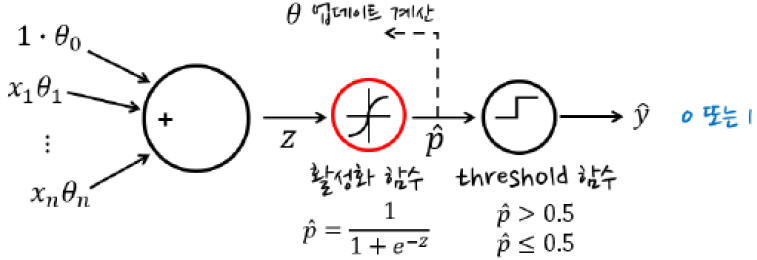

In [ ]:
class SingleLayer_Classifier: 
    def __init__(self, eta=0.1, l1=0, l2=0): 
        self.eta = eta 

        self.W = None 
        self.b = None 

        self.sigmoid = lambda z : 1 / (1 + np.exp(-np.clip(z, -100, None))) 
        
        self.l1 = l1 
        self.l2 = l2 

        self.losses = [] 
        self.val_losses = [] 
        self.W_history = [] 

    def forward(self, x): 
        z = x.dot(self.W) + self.b 
        a = self.sigmoid(z) 
        return a 

    def gradients(self, x, e): 
        W_grad = x * e          # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * e          # 절편에 대한 그래디언트를 계산합니다
        return W_grad, b_grad 
        
    def fit(self, X, y, epochs=100, X_val=None, y_val=None):
        self.W = np.ones(X.shape[1])               # 가중치를 초기화합니다.
        self.b = 0                                 # 절편을 초기화합니다.
        self.W_history.append(self.W.copy())       # 가중치를 기록합니다.
        np.random.seed(42)                         # 랜덤 시드를 지정합니다.
        for _ in range(epochs):                    # epochs만큼 반복합니다.
            loss = 0.
            # 인덱스를 섞습니다
            indexes = np.random.permutation(np.arange(len(X)))
            for i in indexes:                                       # 모든 샘플에 대해 반복합니다
                y_hat = self.forward(X[i]) 
                e = y[i] - y_hat                                    # 오차 계산 
                e = (-1) * e 
                W_grad, b_grad = self.gradients(X[i], e)            # gradients 계산
                # 그래디언트에서 페널티 항의 미분 값을 더합니다
                W_grad += self.l1 * np.sign(self.W) + self.l2 * self.W
                self.W -= self.eta * W_grad                         # 가중치 업데이트
                self.b -= b_grad                                    # 절편 업데이트
                # 가중치를 기록합니다.
                self.W_history.append(self.W.copy())
                # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적합니다
                y_hat = np.clip(y_hat, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(y_hat)+(1-y[i])*np.log(1-y_hat))
            # 에포크마다 평균 손실을 저장합니다
            self.losses.append(loss/len(y) + self.reg_loss())
            # 검증 세트에 대한 손실을 계산합니다
            self.update_val_loss(X_val, y_val)
    
    def predict(self, X):
        y_hat = [self.forward(x_i) for x_i in X] 
        return np.array(y_hat) >= 0.5 
    
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def reg_loss(self):
        return self.l1 * np.sum(np.abs(self.W)) + self.l2 / 2 * np.sum(self.W**2)
    
    def update_val_loss(self, X_val, y_val):
        if X_val is None:
            return
        val_loss = 0.
        for i in range(len(X_val)):
            y_hat = self.forward(X_val[i]) 
            y_hat = np.clip(y_hat, 1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(y_hat)+(1-y_val[i])*np.log(1-y_hat))
        self.val_losses.append(val_loss/len(y_val) + self.reg_loss())

In [ ]:
sl_clf = None 
sl_clf.fit(X_train, y_train)
sl_clf.score(X_val, y_val)

## Feature들 표준 정규화 

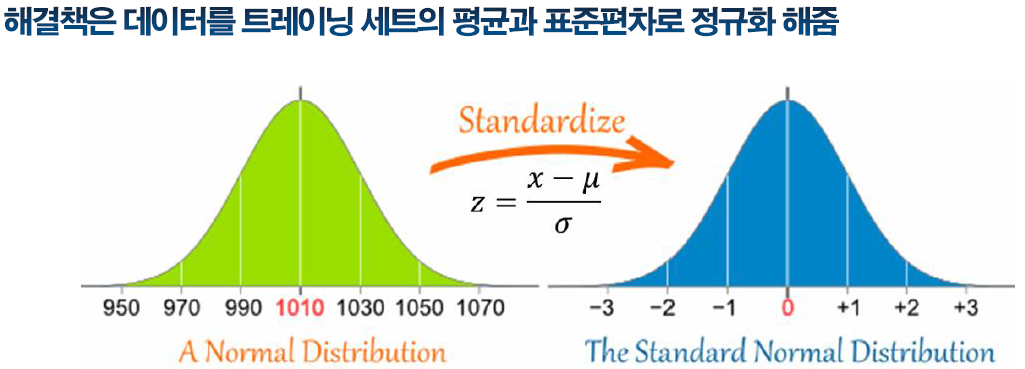

In [ ]:
# [13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf p.8 
mean_of_X_train = np.mean(X_train, axis=0) 
std_of_X_train = np.std(X_train, axis=0) 
X_train_scaled = (X_train - mean_of_X_train) / std_of_X_train 

In [ ]:
mean_of_X_val = np.mean(X_val, axis=0) 
std_of_X_val = np.std(X_val, axis=0) 
X_val_scaled = (X_val - mean_of_X_val) / std_of_X_val 

In [ ]:
sl_clf = SingleLayer_Classifier() 
sl_clf.fit(X_train_scaled, y_train)
sl_clf.score(X_val_scaled, y_val)

## Regularization (Adding penalty/barrier to Loss function) 

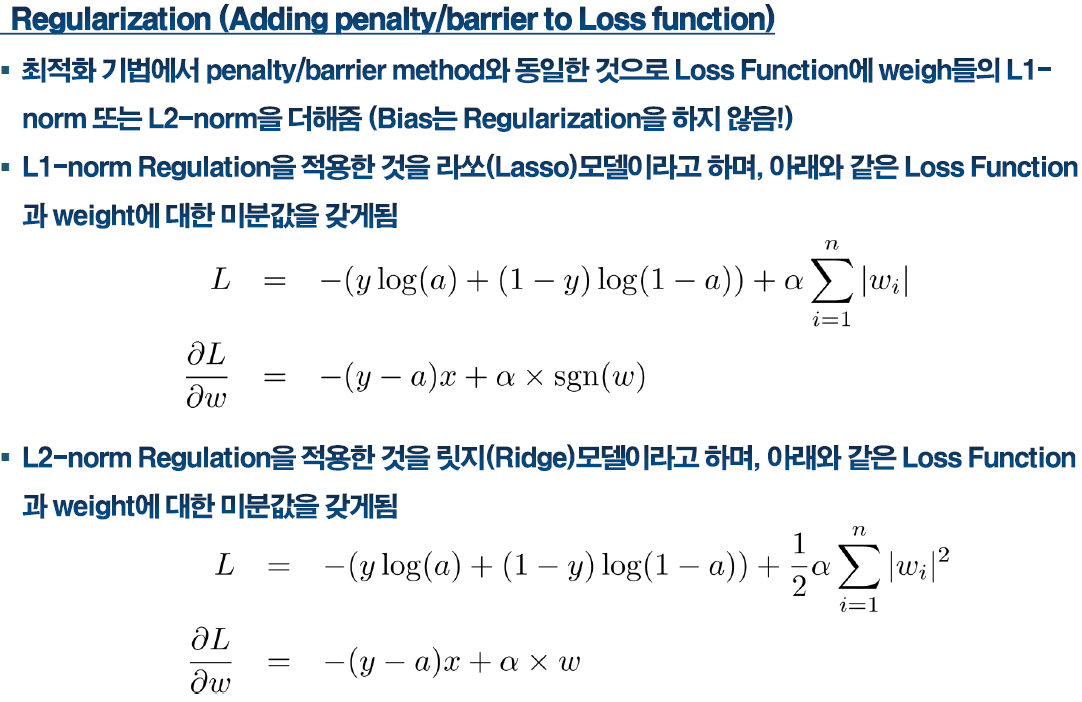

In [ ]:
# [13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf p.10 
sl_clf = SingleLayer_Classifier() 


train_loss, val_loss plotting 

In [ ]:
plt.ylim(0, 0.3)
plt.plot(sl_clf.losses)
plt.plot(sl_clf.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

L1-norm 

In [ ]:
l1_list = [0.0001, 0.001, 0.01]

for l1 in l1_list:
    sl_clf = SingleLayer_Classifier(l1=l1)
    sl_clf.fit(X_train_scaled, y_train, X_val=X_val_scaled, y_val=y_val)
    
    plt.plot(sl_clf.losses)
    plt.plot(sl_clf.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(sl_clf.W, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

L2-norm 

In [ ]:
l2_list = [0.0001, 0.001, 0.01]

for l2 in l2_list:
    sl_clf = SingleLayer_Classifier(l2=l2)
    sl_clf.fit(X_train_scaled, y_train, X_val=X_val_scaled, y_val=y_val)
    
    plt.plot(sl_clf.losses)
    plt.plot(sl_clf.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(sl_clf.W, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4, 4)
    plt.show()

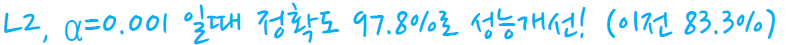

In [ ]:
# [13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf p.11 
sl_clf = None 
sl_clf.fit(X_train_scaled, y_train) 
sl_clf.score(X_val_scaled, y_val)

## k-Fold Cross Validation 

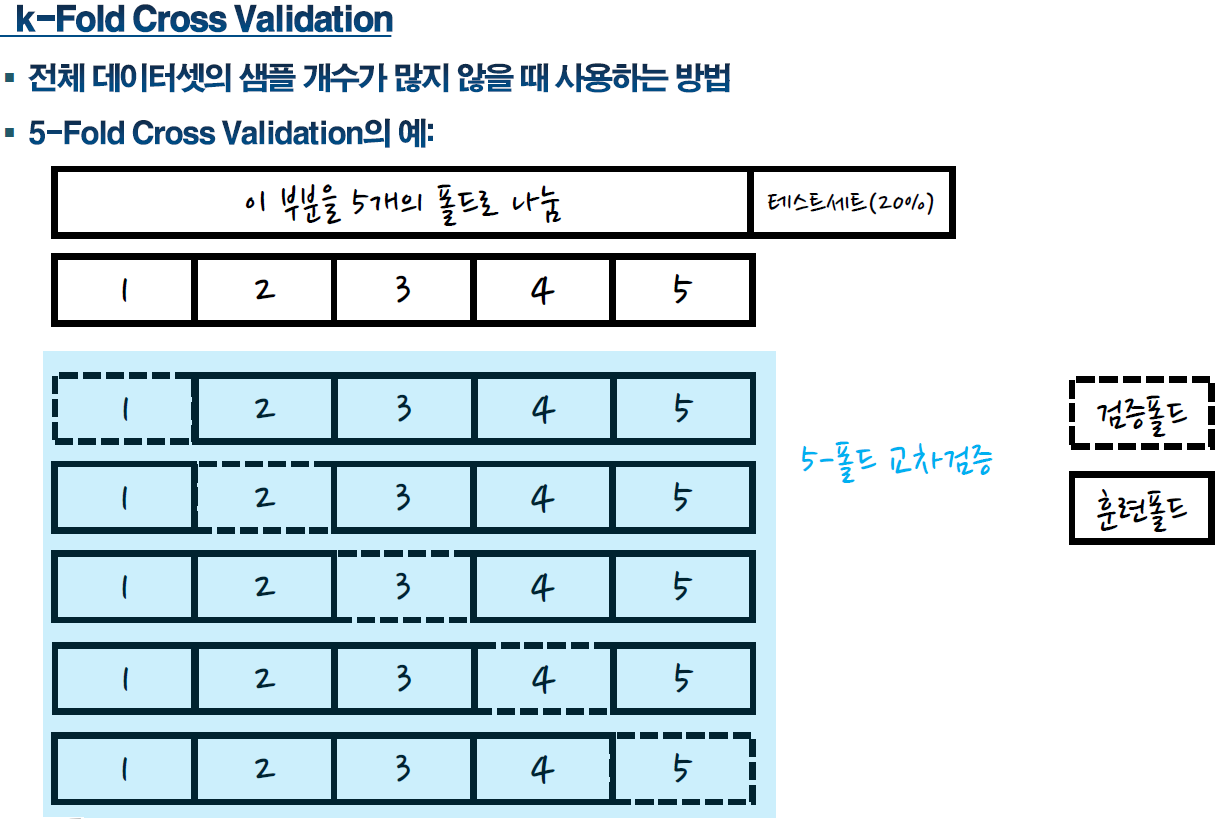

In [ ]:
# [13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf p.12 
validation_scores = [] 

k = None 
bins = len(X_train_org) // k

for i in range(k):
    start = i*bins
    end = (i+1)*bins 
    
    val_fold = X_train_org[start:end]
    val_target = y_train_org[start:end] 

    val_mean = np.mean(val_fold, axis=0)
    val_std = np.std(val_fold, axis=0)
    val_fold_scaled = (val_fold - val_mean) / val_std

    train_index = list(range(0, start))+list(range(end, len(X_train_org)))
    train_fold = X_train_org[train_index]
    train_target = y_train_org[train_index]
    
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std 
    
    sl_clf = SingleLayer_Classifier(l2=0.001) 
    sl_clf.fit(train_fold_scaled, train_target)
    score = sl_clf.score(val_fold_scaled, val_target)
    validation_scores.append(score)

print(np.mean(validation_scores))

In [ ]:
from sklearn.model_selection import cross_validate
sgd = None 
scores = None 
print(np.mean(scores['test_score']))

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
sgd = None 
pipe = make_pipeline(StandardScaler(), sgd)
scores = None 
print(np.mean(scores['test_score']))

In [ ]:
print(np.mean(scores['train_score']))

## Hyperparameter Tuning 

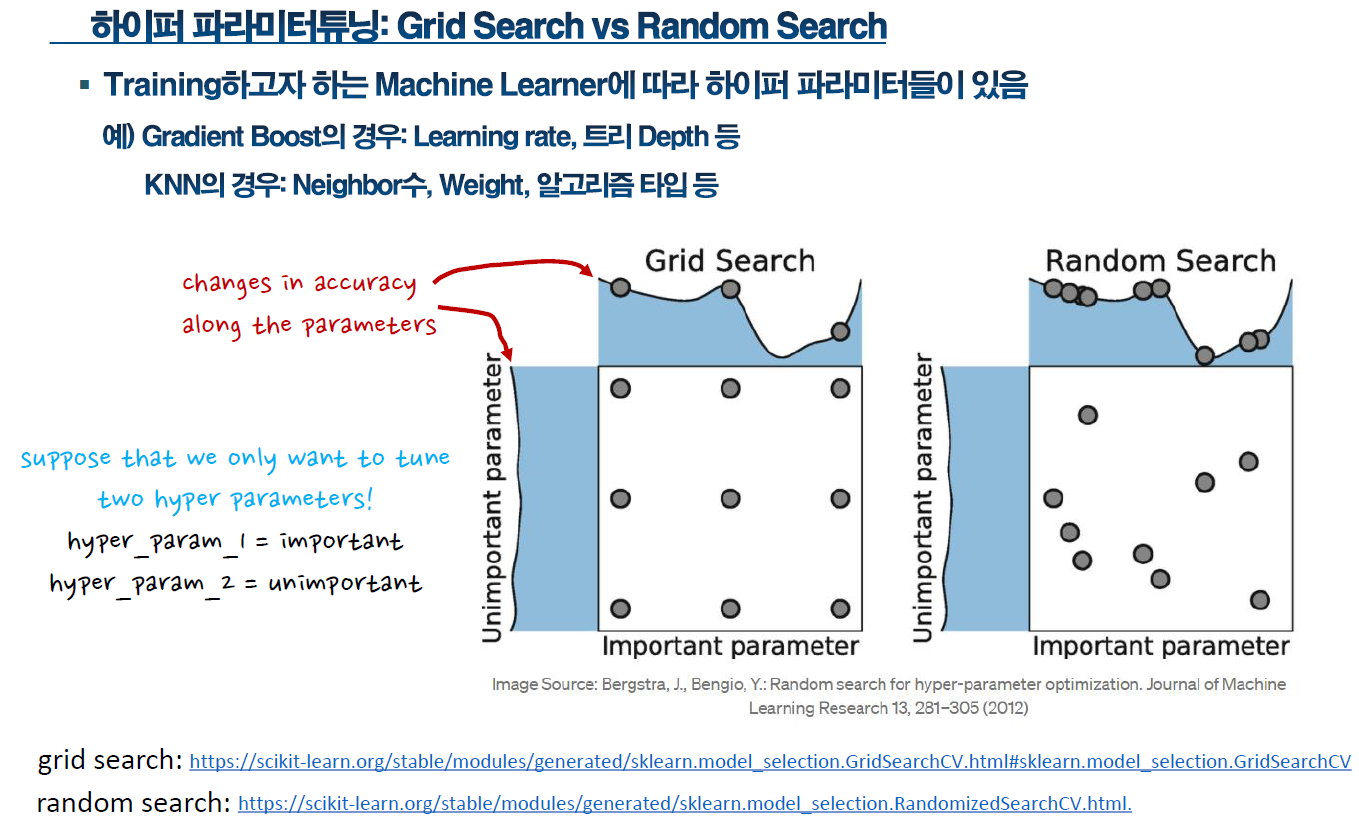

In [ ]:
# [13강] 인공신경망 - Time to Say Goodbye to Simple ANN.pdf p.13 ~ 16  
from sklearn.model_selection import GridSearchCV 

In [ ]:
params = {
    'penalty' : ['l1', 'l2'], 
    'alpha' : [0.1, 0.01, 0.001, 0.0001], 
    'max_iter' : [25, 50, 100]
}

In [ ]:
sgd = SGDClassifier(loss='log', random_state=42)
grid_sgd = GridSearchCV(estimator=None , 
                        param_grid=None, 
                        scoring='accuracy', 
                        cv=5) 
grid_sgd.fit(X_train_scaled, y_train) 

In [ ]:
# extract best parameters 
print(grid_sgd.best_params_)

In [ ]:
# to validate the bestfit 
print(grid_sgd.score(X_val_scaled, y_val))

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
from scipy.stats import uniform 
params = {
    'penalty' : ['l1', 'l2'], 
    'alpha' : uniform(loc=0.0001, scale=0.1-0.0001), 
    'max_iter' : uniform(loc=10, scale=100-10)
}

In [ ]:
sgd = SGDClassifier(loss='log', random_state=42)
random_sgd = RandomizedSearchCV(estimator=None , 
                        param_distributions=None, 
                        scoring='accuracy', 
                        cv=5, 
                        random_state=42) 

In [ ]:
random_sgd.fit(X_val_scaled, y_val)

In [ ]:
# extract best parameters 
print(random_sgd.best_params_)

In [ ]:
# to validate the bestfit 
print(random_sgd.score(X_val_scaled, y_val))

In [ ]:
mean_of_X_train_org = np.mean(X_train_org, axis=0) 
std_of_X_train_org = np.std(X_train_org, axis=0) 
X_train_org_scaled = (X_train_org - mean_of_X_train_org) / std_of_X_train_org 

In [ ]:
sgd = SGDClassifier(loss='log', penalty=grid_sgd.best_params_['penalty'], alpha=grid_sgd.best_params_['alpha'], max_iter=grid_sgd.best_params_['max_iter'], random_state=42)
scores = cross_validate(sgd, X_train_org_scaled, y_train_org, cv=5, return_train_score=True)
print(np.mean(scores['test_score'])) 
print(np.mean(scores['train_score'])) 

In [ ]:
sgd = SGDClassifier(loss='log', penalty=random_sgd.best_params_['penalty'], alpha=random_sgd.best_params_['alpha'], max_iter=random_sgd.best_params_['max_iter'], random_state=42)
scores = cross_validate(sgd, X_train_org_scaled, y_train_org, cv=5, return_train_score=True)
print(np.mean(scores['test_score'])) 
print(np.mean(scores['train_score'])) 

## Test 

In [ ]:
mean_of_X_test = np.mean(X_test, axis=0) 
std_of_X_test = np.std(X_test, axis=0) 
X_test_scaled = (X_test - mean_of_X_test) / std_of_X_test 